In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
sentiment_df = pd.read_csv(r"D:\Datascience Task\project market trading\data\fear_greed_index.csv")
trades_df = pd.read_csv(r"D:\Datascience Task\project market trading\data\historical_data.csv")


In [3]:
print(sentiment_df.shape)
sentiment_df.head(2)


(2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02


In [4]:
trades_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


In [5]:
trades_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [6]:
sentiment_shape = sentiment_df.shape
trades_shape = trades_df.shape

In [ ]:
# Missing values check
sentiment_missing = sentiment_df.isna().sum()
trades_missing = trades_df.isna().sum()

print(sentiment_missing)
print("\n")
print(trades_missing)

timestamp         0
value             0
classification    0
date              0
dtype: int64


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [ ]:
# Duplicates check
sentiment_dupes = sentiment_df.duplicated().sum()
trades_dupes = trades_df.duplicated().sum()

print(sentiment_dupes)
print(trades_dupes)

0
0


In [9]:
sentiment_shape, trades_shape, sentiment_dupes, trades_dupes

((2644, 4), (211224, 16), np.int64(0), np.int64(0))

### so far we can say that there is no missing value and duplicate value in both dataset

In [ ]:
# Convert timestamps 
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [11]:
# Convert trade timestamp
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format="%d-%m-%Y %H:%M",
    errors='coerce'
)

In [12]:
trades_df['date'] = trades_df['Timestamp IST'].dt.floor('D')

trades_df[['Timestamp IST', 'date']].head()

,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [13]:
df = trades_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='inner'
)

df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [14]:
df.shape

(211218, 18)

In [15]:
df['abs_size_usd'] = df['Size USD'].abs()
df['is_win'] = (df['Closed PnL'] > 0).astype(int)
df['is_long'] = (df['Side'].str.upper() == 'BUY').astype(int)

In [ ]:
daily_trader_metrics = df.groupby(
    ['date', 'Account', 'classification']
).agg(
    daily_pnl=('Closed PnL', 'sum'),
    win_rate=('is_win', 'mean'),
    avg_trade_size_usd=('abs_size_usd', 'mean'),
    trades_per_day=('Trade ID', 'count'),
    long_ratio=('is_long', 'mean')
).reset_index()

daily_trader_metrics.head()


,date,Account,classification,daily_pnl,win_rate,avg_trade_size_usd,trades_per_day,long_ratio
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,0.000000,0.000000,159.000000,3,1.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Extreme Greed,0.000000,0.000000,5556.203333,9,0.777778
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-205.434737,0.363636,10291.213636,11,0.454545
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-24.632034,0.000000,5304.975000,2,1.000000
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,0.000000,5116.256667,3,1.000000


### Insights
- Indicates high churn / low edge trading behavior on some days.
- Traders become more active and aggressive in greedy markets, but that does not guarantee profits.
- Win rate is unstable at the daily level, reinforcing why aggregation over time is needed for skill evaluation.
- Confirms sentiment-driven risk behavior
- Traders often commit fully to one direction intraday, especially in Greed conditions.

In [17]:
leverage_proxy = df.groupby('classification')['Size USD'].describe()
leverage_proxy

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,5349.731843,22306.826180,0.01,282.4825,766.150,2329.9700,1120971.60
Extreme Greed,39992.0,3112.251565,11061.998403,0.00,106.7575,500.050,1882.8375,665771.71
Fear,61837.0,7816.109931,51914.859249,0.00,235.6300,735.960,2499.9700,3921430.72
Greed,50303.0,5736.884375,30533.418602,0.00,184.1300,555.000,2100.7000,2227114.71
Neutral,37686.0,4782.732661,37461.883466,0.01,175.5400,547.655,1994.2050,3641180.84


### Insights
- Fear → highest leverage, highest tail risk
- Greed → active but not most leveraged
- Extreme Greed → most conservative sizing
- Risk is dominated by rare, oversized trades

In [26]:
trades_per_day = df.groupby(['date', 'Account']).size().reset_index(
    name='trades_per_day'
)
trades_per_day.head()
trades_per_day[trades_per_day['trades_per_day']==trades_per_day['trades_per_day'].max()]

,date,Account,trades_per_day
1489,2025-02-24,0xbaaaf6571ab7d571043ff1e313a9609a10637864,4083


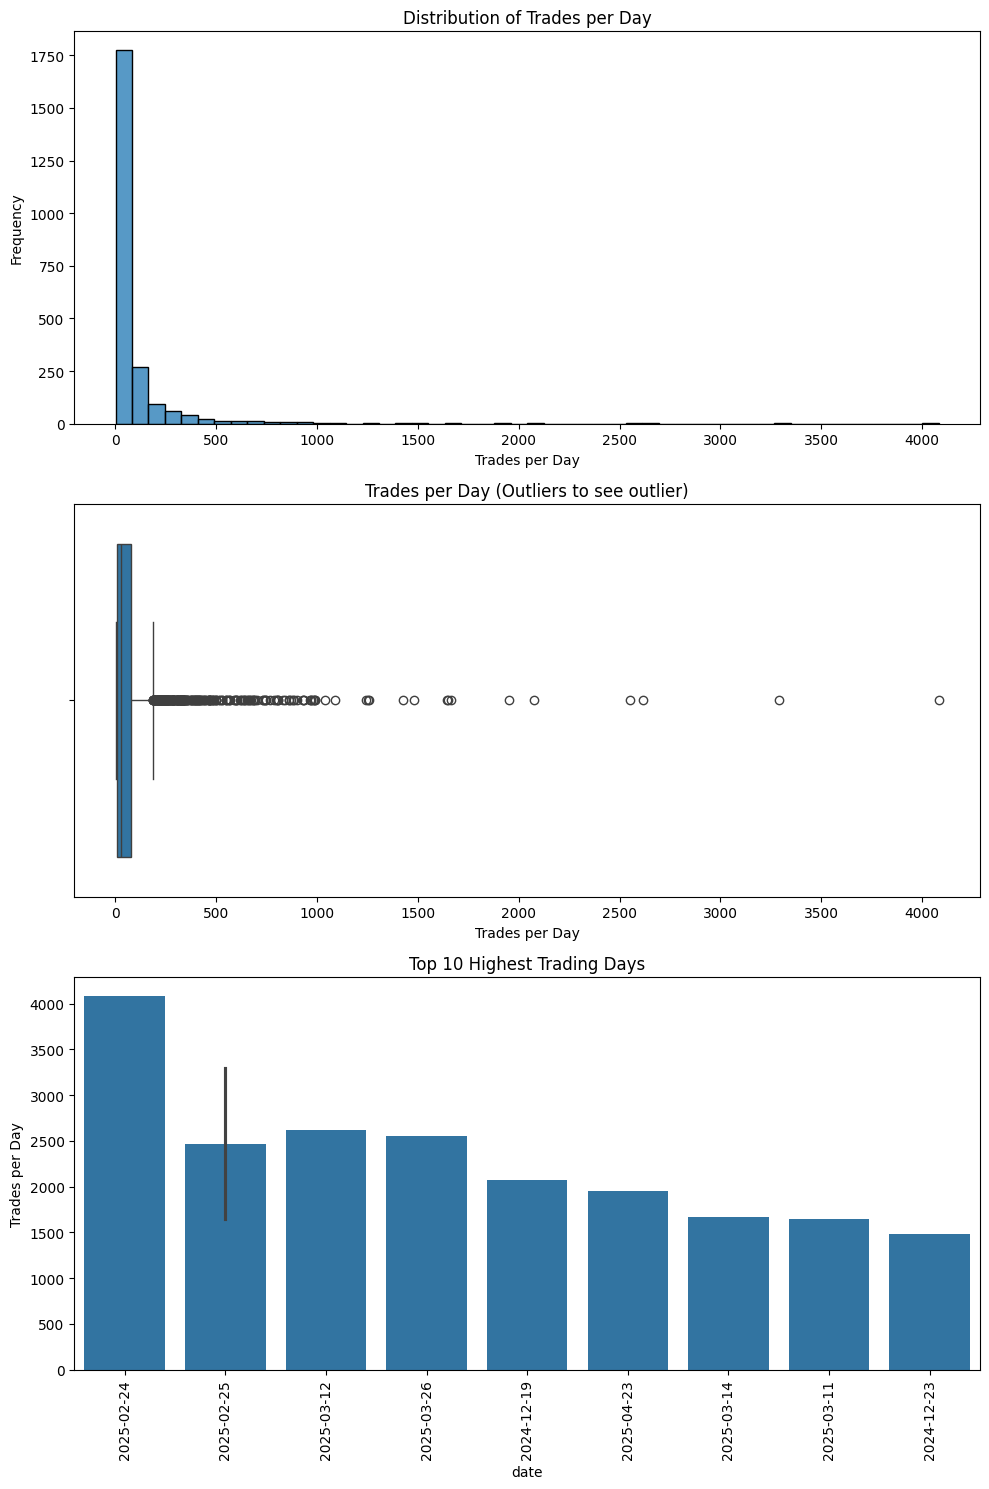

In [82]:

plt.figure(figsize=(10, 15))

# 1. Histogram – Distribution of trades per day
plt.subplot(311)
sns.histplot(trades_per_day['trades_per_day'], bins=50)
plt.title('Distribution of Trades per Day')
plt.xlabel('Trades per Day')
plt.ylabel('Frequency')

# 2. Boxplot – Outlier analysis
plt.subplot(312)
sns.boxplot(x=trades_per_day['trades_per_day'])
plt.title('Trades per Day (Outliers to see outlier)')
plt.xlabel('Trades per Day')

# 3. Bar plot – Top 10 highest trading days
top_trading_days = trades_per_day.sort_values(
    'trades_per_day', ascending=False
).head(10)

plt.subplot(313)
sns.barplot(
    data=top_trading_days,
    x='date',
    y='trades_per_day'
)
plt.title('Top 10 Highest Trading Days')
plt.xlabel('date')
plt.ylabel('Trades per Day')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Insights
- here we can see by trades_per_day max trades by which account and when.


In [27]:
df['is_long'] = (df['Side'].str.upper() == 'BUY').astype(int)

long_short_ratio = df.groupby(['date', 'Account'])['is_long'].mean().reset_index(
    name='long_ratio'
)
long_short_ratio.head()

,date,Account,long_ratio
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.777778
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.454545
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.000000
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.000000


### Task 2

In [28]:
performance_by_sentiment = daily_trader_metrics.groupby('classification').agg(
    avg_daily_pnl=('daily_pnl', 'mean'),
    median_daily_pnl=('daily_pnl', 'median'),
    win_rate=('win_rate', 'mean'),
    drawdown_proxy=('daily_pnl', lambda x: (x < 0).mean())
).reset_index()

performance_by_sentiment


,classification,avg_daily_pnl,median_daily_pnl,win_rate,drawdown_proxy
0,Extreme Fear,4619.439053,218.377399,0.329659,0.193750
1,Extreme Greed,5161.922644,418.319862,0.386387,0.070342
2,Fear,5328.818161,107.892532,0.364033,0.101587
3,Greed,3318.100730,158.214922,0.343559,0.080247
4,Neutral,3438.618818,167.551743,0.355414,0.111702


### Insights
Yes, Performance differs clearly. shown below,

---
- PnL: Fear days have higher average PnL, while Greed days have a higher median PnL.
- Win rate: Fear days show a slightly higher win rate than Greed days.
- Drawdown risk: Greed days have a lower drawdown proxy, indicating fewer losing days.

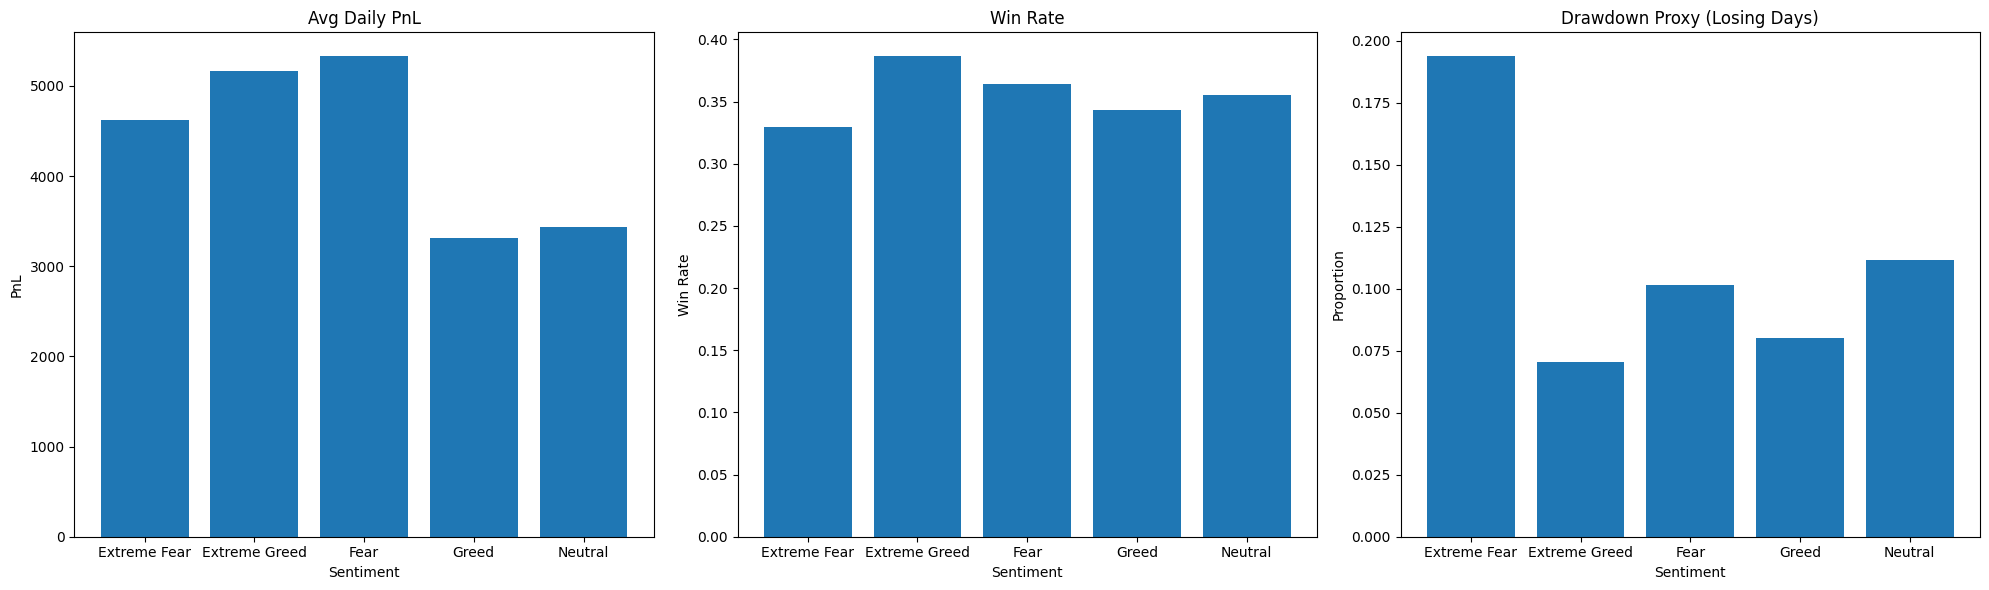

In [56]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Avg Daily PnL
axes[0].bar(
    performance_by_sentiment['classification'],
    performance_by_sentiment['avg_daily_pnl']
)
axes[0].set_title("Avg Daily PnL")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("PnL")

# Win Rate
axes[1].bar(
    performance_by_sentiment['classification'],
    performance_by_sentiment['win_rate']
)
axes[1].set_title("Win Rate")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Win Rate")


# Drawdown Proxy
axes[2].bar(
    performance_by_sentiment['classification'],
    performance_by_sentiment['drawdown_proxy']
)
axes[2].set_title("Drawdown Proxy (Losing Days)")
axes[2].set_xlabel("Sentiment")
axes[2].set_ylabel("Proportion")

plt.tight_layout()
plt.show()

In [29]:
behavior_summary = daily_trader_metrics.groupby('classification').agg(
    avg_trades_per_day=('trades_per_day', 'mean'),
    avg_trade_size=('avg_trade_size_usd', 'mean'),
    avg_long_ratio=('long_ratio', 'mean')
).reset_index()

behavior_summary

,classification,avg_trades_per_day,avg_trade_size,avg_long_ratio
0,Extreme Fear,133.750000,6773.464125,0.531533
1,Extreme Greed,76.030418,5371.637182,0.473116
2,Fear,98.153968,8975.928546,0.518967
3,Greed,77.628086,6427.866594,0.471594
4,Neutral,100.228723,6963.694861,0.472431


### Insights
- Yes ,sentiment Strongly affects trading behavior.

--- 

- Traders trade more frequently during fear, likely due to panic, volatility, and short-term opportunities.
- During Fear, traders take larger positions, indicating higher conviction or aggressive risk-taking.
- In fearful markets, traders lean long (buy-the-dip behavior), while in greed phases they become more balanced or slightly short-biased.

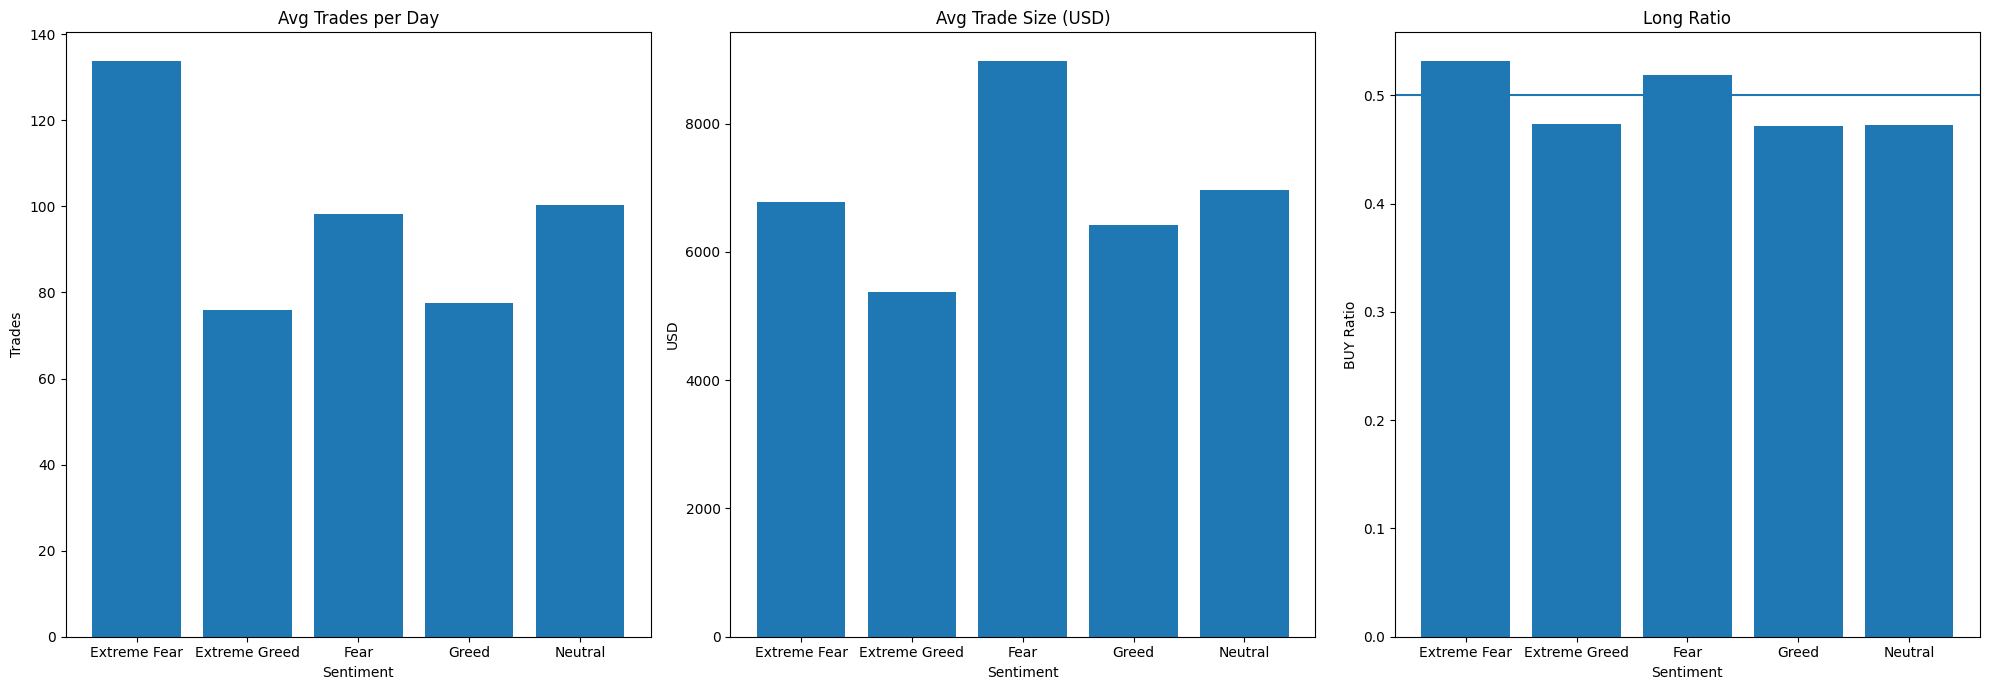

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Trades per Day
axes[0].bar(
    behavior_summary['classification'],
    behavior_summary['avg_trades_per_day']
)
axes[0].set_title("Avg Trades per Day")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Trades")

# Avg Trade Size
axes[1].bar(
    behavior_summary['classification'],
    behavior_summary['avg_trade_size']
)
axes[1].set_title("Avg Trade Size (USD)")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("USD")

# Long Ratio
axes[2].bar(
    behavior_summary['classification'],
    behavior_summary['avg_long_ratio']
)
axes[2].set_title("Long Ratio")
axes[2].set_xlabel("Sentiment")
axes[2].set_ylabel("BUY Ratio")
axes[2].axhline(0.5)

plt.tight_layout()
plt.show()

In [30]:
# Risk proxy = average USD trade size per account
risk_profile = df.groupby('Account')['Size USD'].mean()

median_risk = risk_profile.median()

df['risk_group'] = df['Account'].map(
    lambda x: 'High Risk' if risk_profile[x] >= median_risk else 'Low Risk'
)

risk_segment = df.groupby('risk_group').agg(
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_win', 'mean')
)

risk_segment


,avg_pnl,win_rate
risk_group,,
High Risk,99.587777,0.367207
Low Risk,24.856270,0.431693


### Insights
- High risk → higher PnL, lower reliability
- Low risk → higher reliability, lower PnL

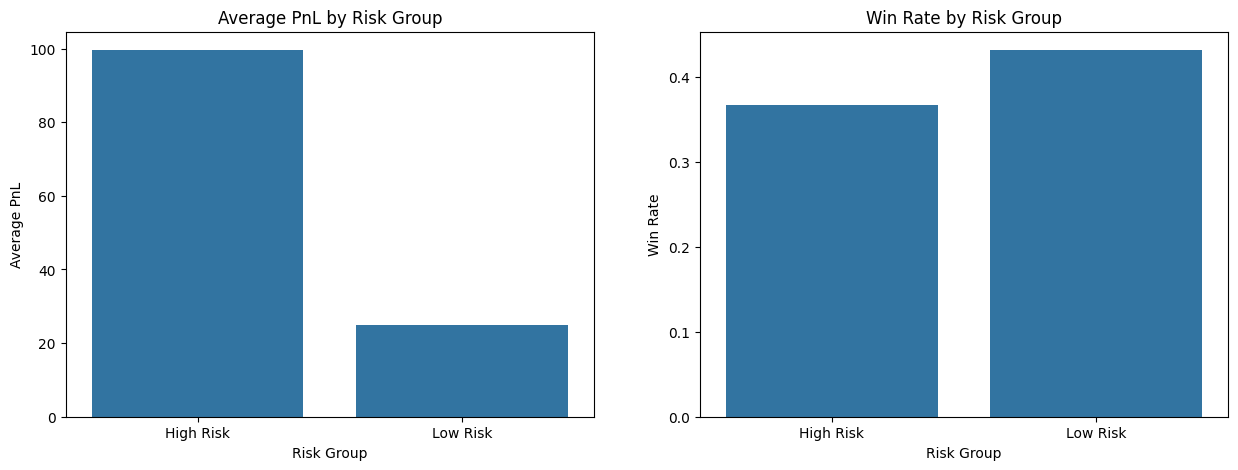

In [72]:

fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.barplot(data=risk_segment.reset_index(), x='risk_group', y='avg_pnl')
plt.title("Average PnL by Risk Group")
plt.xlabel("Risk Group")
plt.ylabel("Average PnL")

plt.subplot(122)
sns.barplot(data=risk_segment.reset_index(), x='risk_group', y='win_rate')
plt.title("Win Rate by Risk Group")
plt.xlabel("Risk Group")
plt.ylabel("Win Rate")

plt.show()

In [32]:
trade_counts = df.groupby('Account').size()
median_trades = trade_counts.median()

df['frequency_group'] = df['Account'].map(
    lambda x: 'Frequent' if trade_counts[x] >= median_trades else 'Infrequent'
)

freq_segment = df.groupby('frequency_group').agg(
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_win', 'mean')
)

freq_segment

,avg_pnl,win_rate
frequency_group,,
Frequent,42.493421,0.415438
Infrequent,95.216371,0.378962


### Insights
- Infrequent traders earn more on average, despite a lower win rate.
- Frequent traders win more often, but their profits per trade are smaller, likely due to overtrading or higher transaction costs.
- Higher frequency seems to favor consistency, while lower frequency favors larger, higher-conviction trades.

Text(0, 0.5, 'Win Rate')

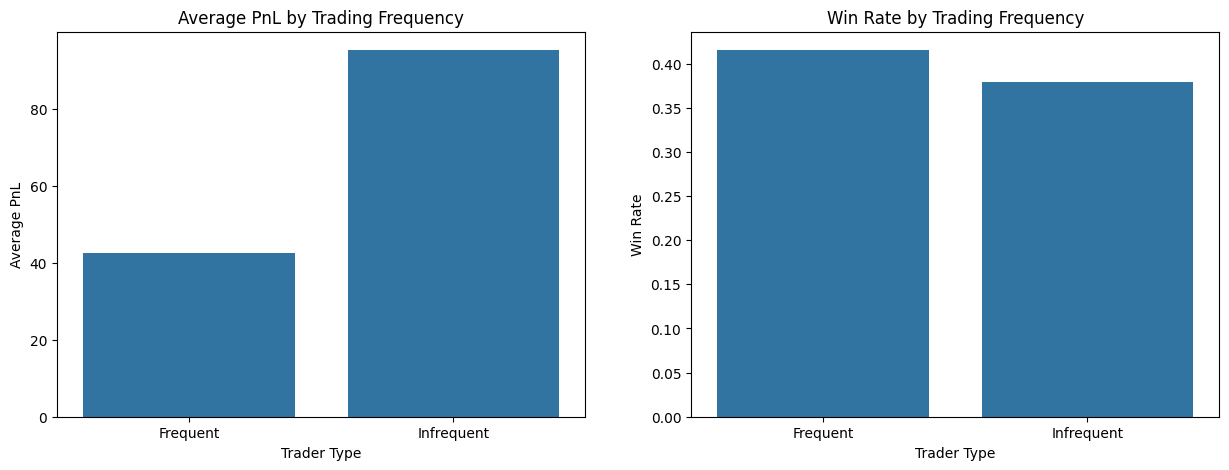

In [75]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.barplot(data=freq_segment.reset_index(), x='frequency_group', y='avg_pnl')
plt.title("Average PnL by Trading Frequency")
plt.xlabel("Trader Type")
plt.ylabel("Average PnL")

plt.subplot(122)
sns.barplot(data=freq_segment.reset_index(), x='frequency_group', y='win_rate')
plt.title("Win Rate by Trading Frequency")
plt.xlabel("Trader Type")
plt.ylabel("Win Rate")

In [33]:
pnl_std = df.groupby('Account')['Closed PnL'].std()
median_std = pnl_std.median()

df['consistency_group'] = df['Account'].map(
    lambda x: 'Consistent' if pnl_std[x] <= median_std else 'Inconsistent'
)

consistency_segment = df.groupby('consistency_group').agg(
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_win', 'mean')
)

consistency_segment

,avg_pnl,win_rate
consistency_group,,
Consistent,16.697081,0.419229
Inconsistent,99.809238,0.398404


### Insights
#### Consistent traders
- Avg PnL: ~16.7
- Win rate: ~41.9%
- Lower volatility → steady but modest returns
#### Inconsistent traders
- Avg PnL: ~99.8
- Win rate: ~39.8%
- Higher volatility → larger profits but less reliable outcomes

-- --
- Consistency does NOT mean higher profits; it means lower variance and smoother equity curves.
- Inconsistent traders earn more on average, but with greater risk and swings.
- Slightly higher win rate among consistent traders suggests better risk control.

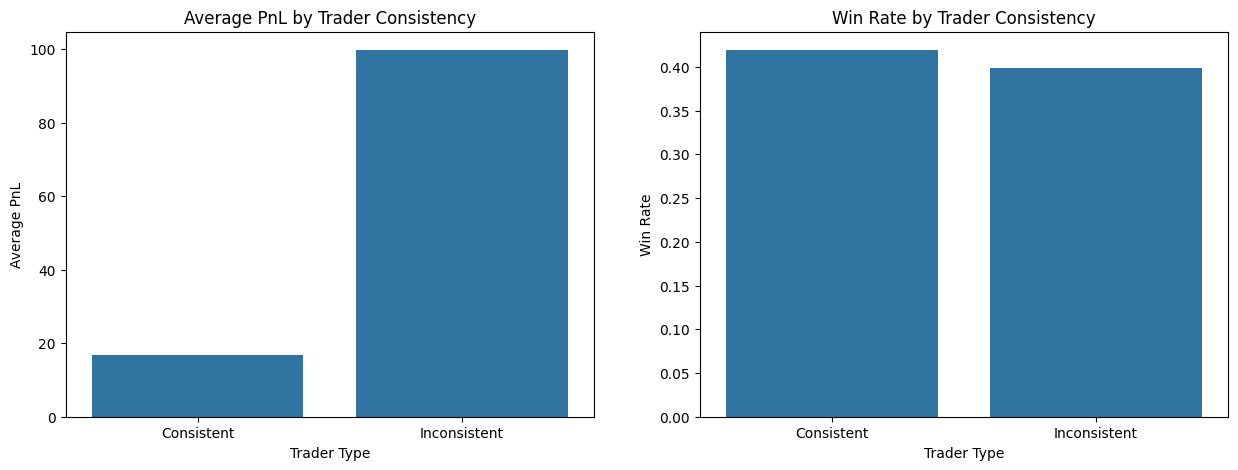

In [76]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.barplot(data=consistency_segment.reset_index(), x='consistency_group', y='avg_pnl')
plt.title("Average PnL by Trader Consistency")
plt.xlabel("Trader Type")
plt.ylabel("Average PnL")

plt.subplot(122)
sns.barplot(data=consistency_segment.reset_index(), x='consistency_group', y='win_rate')
plt.title("Win Rate by Trader Consistency")
plt.xlabel("Trader Type")
plt.ylabel("Win Rate")

plt.show()